<a href="https://colab.research.google.com/github/grant88/education/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Алгоритмы кластеризации KMeans, DBSCAN, AgglomerativeClustering

In [1]:
import numpy as np
import cv2
import skimage

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from skimage.metrics import structural_similarity as ssim

### Загрузка оригинального изображения и предобработка данных

In [45]:
path = 'flower.jpg'
img = cv2.imread(path)

#### Уменьшим размер картинки для оптимизации расчетов

In [47]:
original_image = cv2.resize(img, (128, 128))
height, width, depth = original_image.shape
print(f"height: {height}, width: {width}, depth: {depth}")

height: 128, width: 128, depth: 3


#### Преобразование картинки (3х-мерный массив) в 2х-мерный массив точек **X**

In [48]:
X = original_image.reshape((height * width, dim))

#### Функция для отображения картинки:

In [50]:
def draw_picture(image, title):
    b, g, r = cv2.split(image)
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

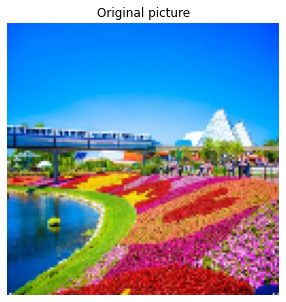

In [51]:
draw_picture(original_image, 'Original picture')

## Реализация 3х моделей кластеризации

### Реализация моделей с параметром n_clusters - KMeans, AgglomerativeClustering

Для каждого из 2х типов моделей


*   KMeans,
*   AgglomerativeClustering,

и для каждого размера кластера


*   2,
*   5,
*   10,
*   20,


выполним:


1.   Обучение модели, с параметром кол-ва требуемых кластеров - 2, 5, 10, 20
2.   Сохранение кластеров (цветов кластеров)
3.   Преобразование массива номеров кластеров **labels** в массив с цветами кластеров
4.   Преобразование 2х мерного массива в 3х мерный для отрисовки изображения
5.   Подсчет метрики SSIM, которая сравнивает оригинальное изображение и получившееся после обучения модели
6.   Отображения получившейся картинки








Clasterization model: KMeans


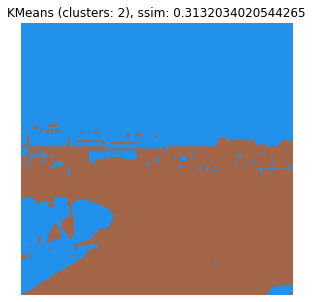

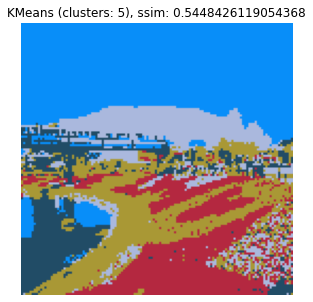

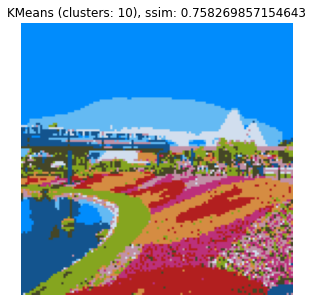

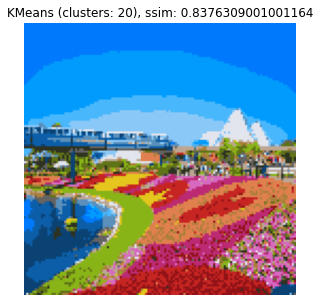





Clasterization model: AgglomerativeClustering


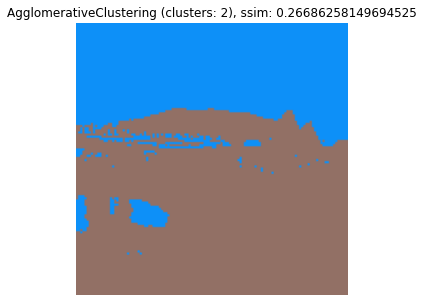

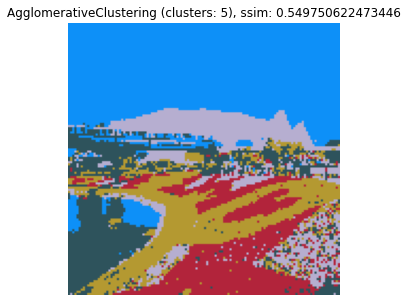

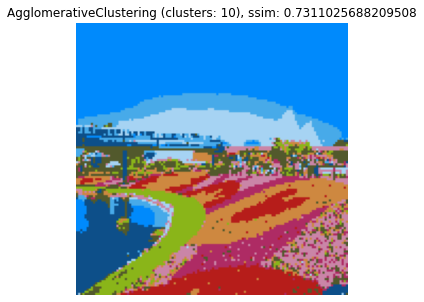

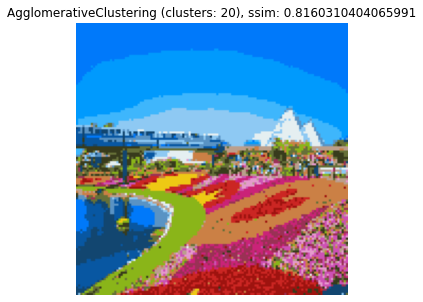

In [52]:
for clusterization_model in [KMeans, AgglomerativeClustering]:
    model_name = clusterization_model.__name__
    print(f"\n\n\n\nClasterization model: {model_name}")
    for n_clusters in [2, 5, 10, 20]:

        # Обучение модели
        model = clusterization_model(n_clusters=n_clusters)
        model.fit(X)

        # цвет кластеров 
        if model_name == 'AgglomerativeClustering':
            centers = [np.mean(X[model.labels_ == cluster_num], axis=0) for cluster_num in np.unique(model.labels_)]
        else:
            centers = model.cluster_centers_
        centers = np.uint8(centers)

        # формирование массива картинки с новыми цветами
        result_image = np.array([centers[i] for i in model.labels_])
        result_image.shape = original_image.shape

        # подсчет метрики SSIM
        ssim_value = ssim(original_image, result_image, multichannel=True)

        # отрисовка картинки с пояснениями
        draw_picture(result_image, f'{model_name} (clusters: {n_clusters}), ssim: {ssim_value}')

### Реализация модели без параметра n_clusters -  DBSCAN

#### Преобразуем массив картинки через StandardScaler

In [53]:
X_scaled = StandardScaler().fit_transform(X)

Для каждой пары параметров eps, min_samples

*   eps=0.005, min_samples=1
*   eps=0.05, min_samples=2

выполним:



1.   Обучение модели DBSCAN
2.   Новый пункт




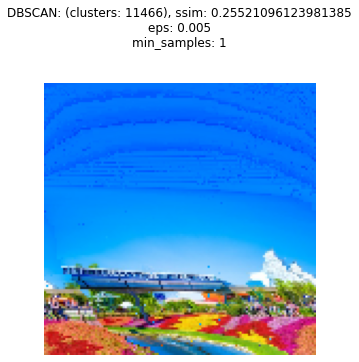

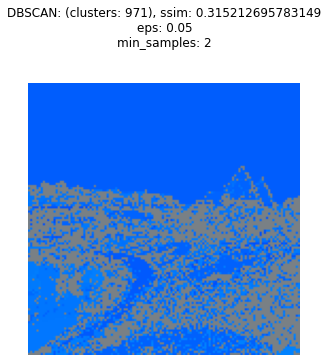

In [54]:
for eps, min_samples in [(0.005, 1), (0.05, 2)]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X_scaled)

        n_clusters_ = np.unique(model.labels_).size - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        result_image = np.array([X[i] for i in model.labels_])
        result_image.shape = original_image.shape
        ssim_value = ssim(original_image, result_image, multichannel=True)
        description = f"DBSCAN: (clusters: {n_clusters_}), ssim: {ssim_value}\neps: {eps}\nmin_samples: {min_samples}\n\n"
        draw_picture(result_image, description)